# Preliminary Experiment
To begin exploring the relationships in our data we decided to apply k-means clustering analysis. 

In [7]:
# Imports
import pandas as pd
from pandas.plotting import scatter_matrix
# pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as skl
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, scale
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import set_config
set_config(transform_output="pandas")
from IPython.display import display
%matplotlib inline

SEED = 42
np.random.seed(SEED)

Loading the cleaned data

In [8]:
data = pd.read_csv("data/merged_data_clean.csv")
data.head()

,County,Households Served,Individuals Served,Pounds of Food Distributed,Children Served via non-federal child nutrition programs,Pounds of food distributed via non-federal child nutrition progr,Virginia City/County Boundaries,LAT,LON,Pop2010,...,laseniors1share,lawhite1share,lablack1share,laasian1share,lanhopi1share,laaian1share,laomultir1share,lahisp1share,lahunv1share,lasnap1share
0,Accomack County,21391.0,62975.0,1248586.00,3112.0,42929.0,432.0,37.765943,-75.757807,33164.0,...,13.681111,59.306667,19.977778,0.393333,0.070000,0.308889,3.928889,4.670000,8.121111,11.140000
1,Albemarle County,29526.0,78415.0,2044282.70,857.0,18305.0,1464.0,38.024184,-78.553506,98970.0,...,9.564500,54.430000,4.594000,1.264872,0.023500,0.146000,2.497500,2.781000,1.136000,2.292500
2,Alleghany County,4393.0,11912.0,312425.78,0.0,0.0,180.0,37.787905,-80.008669,16250.0,...,17.011667,82.010000,2.348333,0.120000,0.031667,0.143333,1.031667,0.818333,4.220000,9.371667
3,Amelia County,1762.0,5334.0,123632.00,0.0,0.0,1224.0,37.331927,-77.977462,12690.0,...,15.590000,72.275000,22.515000,0.215000,0.035000,0.438125,2.660000,2.280000,3.305000,10.420000
4,Amherst County,12190.0,28650.0,1307267.61,3187.5,30019.0,396.0,37.630362,-79.147848,32353.0,...,9.536667,47.644444,12.000000,0.243333,0.013333,0.438125,1.845556,1.212222,2.373333,6.264444


In [9]:
print("# entries: ", data.shape[0])
print("# features: ", data.shape[1])
print("# categorical features: ", len(data.select_dtypes(include=['object']).columns.tolist()))
print("List categorical features: ", data.select_dtypes(include=['object']).columns.tolist())
print("# missing values: ", data.isnull().sum().sum())
desc_data = data.describe()
desc_data

# entries:  129
# features:  103
# categorical features:  1
List categorical features:  ['County']
# missing values:  0


,Households Served,Individuals Served,Pounds of Food Distributed,Children Served via non-federal child nutrition programs,Pounds of food distributed via non-federal child nutrition progr,Virginia City/County Boundaries,LAT,LON,Pop2010,OHU2010,...,laseniors1share,lawhite1share,lablack1share,laasian1share,lanhopi1share,laaian1share,laomultir1share,lahisp1share,lahunv1share,lasnap1share
count,129.000000,129.000000,1.290000e+02,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,10442.325581,31447.705426,6.752746e+05,799.259690,11578.108527,936.434109,37.526000,-78.551888,39785.736434,15824.751938,...,11.066008,52.920615,11.827629,0.484522,0.022247,0.193238,1.818989,1.799169,3.531992,7.574178
std,9164.694565,28350.674849,6.380606e+05,1184.974626,17472.897261,609.911108,0.680862,1.739062,35223.856365,14275.178774,...,5.824876,25.579737,12.193551,0.355817,0.020057,0.113218,0.932313,1.117708,1.967011,4.839059
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,12.000000,36.583334,-83.130112,2321.000000,1081.000000,...,0.397143,0.685000,0.090000,0.010000,0.000000,0.000000,0.025000,0.025000,0.030000,0.080000
25%,3671.000000,10899.000000,2.188850e+05,0.000000,0.000000,420.000000,36.974561,-79.732898,14068.000000,5706.000000,...,5.680000,30.652182,2.150625,0.212308,0.007500,0.116250,1.110000,0.920000,1.984706,3.765909
50%,7002.000000,21822.000000,3.951699e+05,0.000000,0.000000,923.000000,37.361054,-78.242313,25587.000000,10045.000000,...,11.381250,56.712500,7.330000,0.379444,0.017778,0.183333,1.680000,1.645000,3.295000,6.924000
75%,14013.000000,42082.000000,9.490441e+05,1275.000000,19807.000000,1380.000000,37.971681,-77.259732,54842.000000,22780.000000,...,15.240625,72.275000,18.695714,0.633333,0.032500,0.245000,2.411000,2.420000,4.676739,10.786667
max,29526.000000,88856.500000,2.044283e+06,3187.500000,49517.500000,2820.000000,39.203637,-75.757807,116003.000000,48391.000000,...,28.113333,98.620000,43.513348,1.264872,0.070000,0.438125,4.362500,4.670000,8.714789,19.935000


In [10]:
# DO NOT RUN! Instead, refer to feature_scatter_matrix.png
# scatter_matrix(data, figsize=(200, 200))

Looking at the above we can observe 6 variables that are categorical, but have been one-hot encoded. These are: 
* Urban
* LLATracts_halfAnd10
* LowincomeTracts
* LA1and10
* LAhalfand10
* LATracts_half

Each of these features serves as a flag for a characteristic of a particular census tract.

Experiment with creating labels for classification

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

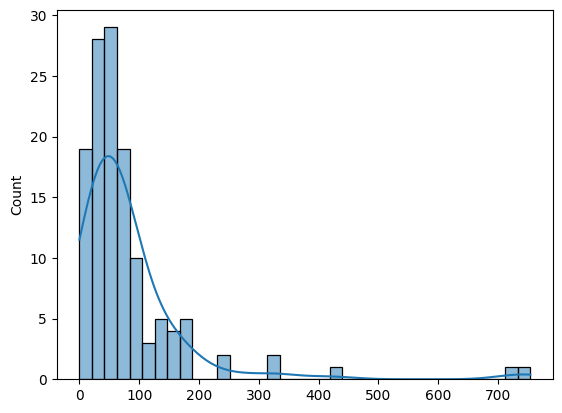

In [11]:
lbs_per_LI = data['Pounds of Food Distributed'] / data['TractLOWI']
sns.histplot(lbs_per_LI, kde=True)

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

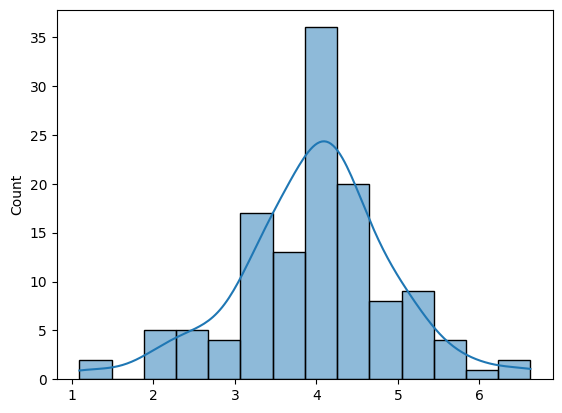

In [12]:
log_lbs_per_LI = np.log(lbs_per_LI)
sns.histplot(log_lbs_per_LI, kde=True)

Let's turn this into a label

In [13]:
np.sum([val == 0.0 for val in lbs_per_LI])

3

3 counties in the data have a value of 0 for lbs_per_LI. We'll impute these with the minimum value to move forward.

In [14]:
min_lbs_per_LI = np.min([val for val in lbs_per_LI if val > 0.0])
imputed_lbs_per_LI = np.array([min_lbs_per_LI if val == 0.0 else val for val in lbs_per_LI])

Now we take the log and make the bins

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

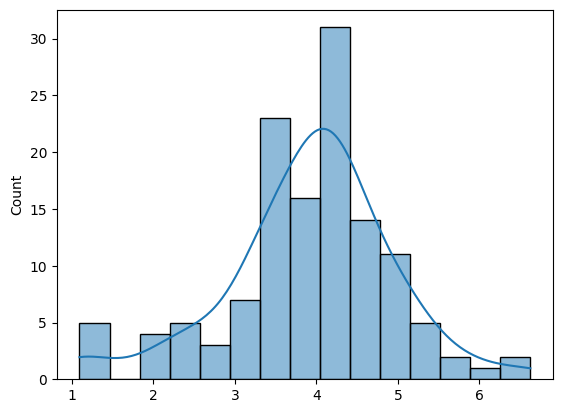

In [15]:
log_lbs_per_LI = np.log(imputed_lbs_per_LI)
sns.histplot(log_lbs_per_LI, kde=True)

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bin_lbs_per_LI', ylabel='Count'>

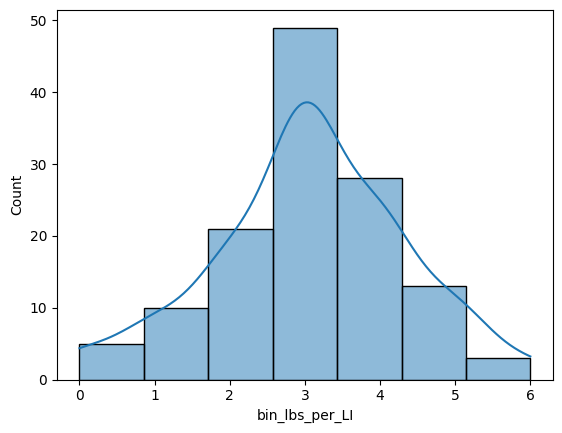

In [16]:
NUM_CATEGORIES = 7
data['bin_lbs_per_LI'] = pd.cut(log_lbs_per_LI, bins=NUM_CATEGORIES, labels=False)
sns.histplot(data=data, x='bin_lbs_per_LI', kde=True, bins=NUM_CATEGORIES)

Take out County and class labels

In [17]:
counties = data.pop('County')
labels = data.pop('bin_lbs_per_LI')

Drop all other county-identifying information

In [18]:
data.drop(['Virginia City/County Boundaries', 'LAT', 'LON'], axis=1, inplace=True)

Setting up a sklearn pipeline

In [19]:
num_attribs = data.select_dtypes(exclude=['object']).columns.tolist()

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

full_pipeline = ColumnTransformer([
        ("", num_pipeline, num_attribs)
    ])

data_prepared = full_pipeline.fit_transform(data)

Conducting clustering 

In [23]:
kmeans = KMeans(n_clusters=NUM_CATEGORIES, n_init='auto').fit(data_prepared)
print(skl.metrics.silhouette_score(data_prepared, kmeans.labels_, metric='cosine'))
print(skl.metrics.v_measure_score(labels.to_numpy(), kmeans.labels_))

0.21292568815586624
0.152596218133047


In [24]:
DBS = DBSCAN(eps=8).fit(data_prepared)
print(skl.metrics.silhouette_score(data_prepared, DBS.labels_, metric='cosine'))
skl.metrics.v_measure_score(labels.to_numpy(), DBS.labels_)

0.218750008114811


0.15767973088068252

In [25]:
GM = GaussianMixture(n_components=NUM_CATEGORIES).fit(data_prepared)
print(skl.metrics.silhouette_score(data_prepared, GM.predict(data_prepared), metric='cosine'))
skl.metrics.v_measure_score(labels.to_numpy(), GM.predict(data_prepared))

0.35000208793774956


0.16573071160640612

### Tune Clustering

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette_caller(estimator, X):
    score = silhouette_score(X=X, labels=estimator.labels_)
    return score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    "n_clusters": stats.randint(2, 8)
}

kmeans = KMeans(n_init='auto')
tuner = RandomizedSearchCV(kmeans, param_dist, scoring=silhouette_caller)
tuned = tuner.fit(data_prepared)

print(tuned.best_params_)
print(skl.metrics.silhouette_score(data_prepared, tuned.best_estimator_.labels_, metric='cosine'))
pd.DataFrame(tuned.cv_results_)

In [ ]:
param_dist = {
    "eps": stats.uniform(0.5, 10),
    "min_samples": stats.randint(2, 25),
}

DBS = DBSCAN()
tuner = RandomizedSearchCV(DBS, param_dist, scoring=silhouette_caller)
tuned = tuner.fit(data_prepared)

print(tuned.best_params_)
print(skl.metrics.silhouette_score(data_prepared, tuned.best_estimator_.labels_, metric='euclidean'))
pd.DataFrame(tuned.cv_results_)

In [ ]:
DBS = DBSCAN(eps=8).fit(data_prepared)
print(skl.metrics.silhouette_score(data_prepared, DBS.labels_, metric='cosine'))

In [ ]:
GM = GaussianMixture(n_components=NUM_CATEGORIES).fit(data_prepared)
print(skl.metrics.silhouette_score(data_prepared, GM.predict(data_prepared), metric='cosine'))